# <center>Location-based Clustering for Business Analysis</center>

## <center>Applied Data Science Capstone Project</center>
### *<center>Author:  Daniel JIMÉNEZ ZORRILLA</center>*
#### *<center>E-mail: danieljzorrilla@gmail.com</center>*

## Abstract

**Relying on Hotelling's Model of Spatial Competition and the concept of Nash Equilibrium from Game Theory as a starting point, this project aims to identify the cluster formation phenomenon of same-kind businesses and to analyze the customer-preferences statistics of the aforementioned clusters in order to identify business opportunities and help in the business decision-making process and market analysis.**

## Index

- [Introduction](#Introduction:-Game-Theory-and-Nash-Equilibrium)
- [Objective and scope of the project](#Objective-and-scope-of-the-project)
- [Project Implementation](#Project-Implementation)
    - [Tools](#Tools)
    - [Importing the necessary libraries](#Importing-the-necessary-libraries)
    - [Setting the specific location and the radius covered](#Setting-the-specific-location-and-the-radius-covered)
    - [Exploring the Venue Categories offered by Foursquare](#Exploring-the-Venue-Categories-offered-by-Foursquare)
    - [Exploring the available venues of a given category](#Exploring-the-available-venues-of-a-given-category)
    - [Getting the Rating for the retrieved Venues](#Getting-the-Rating-for-the-retrieved-Venues)
    - [Finding clusters based on location](#Finding-clusters-based-on-location)
    - [Cluster visualization](#Cluster-visualization)
- [Conclusions](#Conclusions)
- [References](#References)

## Introduction: Game Theory and Nash Equilibrium

Phenomena in different fields can often be abstracted, reduced and analyzed as situations governed by some rules, where one or multiple **players** make **moves** to try to achieve a particular **objective**, either cooperatively or in spite of the other players (which in this case would be opponents). This abstracted, simplified and formalized models is what *Game Theory* defines as **games**.

Focusing on a free-competence economic scenario, let us consider a model known as **Hotelling's Model of Spatial Competition**, or rather a variation of it. In Hotelling's original model, different businesses or retailers with identical products (these are the *players*) are fixed and located on a defined space (traditionally one dimensional, that is along a finite line that might represent a street, for instance), and compete by setting the prices of their products (these are the *moves* they can make) in order to maximize their profits (this would be their *objective*). There are some additional rules, though:
- The customers are uniformly distributed in the given space (i.e. there are no high and low customer concentration zones).
- For the customer, there's a cost proportional to the distance he/she has to travel to get the product. (i.e. distance to the retailer matters for the customer).
- Customers don't have a personal preference for a given retailer. They are driven just by the minimization of their cost to get the product.

The version of Hotelling's model that is considered in this work is exactly the same, but the location becomes the free variable and the prices are equal and fixed. That means that the moves the players can make are spatial movements in the defined space in order to maximize their profits. This is exemplified in the video shown below:

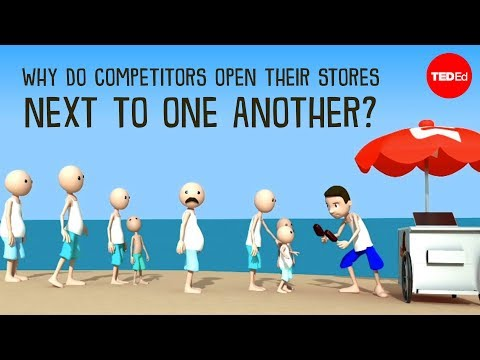

In [1]:
# The code was removed by Watson Studio for sharing.

As the video explains, due to the conditions of the game, the retailers will move until an equilibrium is reached, where none of them can have a better position and the profit would be maximized for all of them. This situation in which each and every player simultaneously has run out of moves that can increase their profit is called the **Nash Equilibrium**. In our game, equilibrium is reached when the retailers end up in the center of the defined space, sharing customers equally.

This can be extended to a two-dimensional case as well, where the defined space may be a disk of a finite radius in which the customers are uniformly distributed. The Nash Equilibrium would be the same: all the retailers will move until they all converge to the center of the disk, dividing it in sectors of equal areas.

In reality, there are more factors involved in a competitive economy of a certain good or service, but this simplified model serves us to explain why we often see geographic clusters of businesses of the same kind.

## Objective and scope of the project

Now we know that businesses have a natural tendency to form clusters and the reason for it. But, although this do happens in the real world, the game considered is a simplification. In reality, factors like *marketing*, *product and/or service quality*, *added value*, *different prices* and many more, are additional variables that allow businesses to **compete for the customers** and **stand out**.

**_Objective:_ Identify business clusters and extract consumer-preferences statistics in order to provide insight and useful information that aids in the business strategic decision-making, opportunity-detection and market analysis processes.**

Imagine that you wish to run your own coffee shop. Where would you do it? Well, now that we know that businesses tend to cluster because they maximize their revenues by doing so, you should look for the coffee shop clusters in your city and settle there. But that's not it. You want to get as much advantage as possible over the competitors you will face. In order to choose a particular location, you may look for the coffee shop clusters that perform poorly according to the customers' reviews. In such a cluster there's a business opportunity, since the expectations of the customers are not being met, the competitors are not succeeding at doing so and therefore the competence is weak in the zone.

A natural, finer next step would be to analyze in detail the comments of the customers' reviews to take specific actions oriented to satisfy the customer's needs, but that is out of the scope of this project and reamins as a future direction to explore.

## Project Implementation

### Tools

This project utilizes the **Foursquare API**, an interface to request data from the Foursquare Data Base, to obtain the required information about the businesses of a given category on a chosen location. This API was chosen for simplicity and due to the suggestion of the corresponding course this project is associated with. It is possible that other APIs could provide more and more accurate data that may boost the quality and utility of the results, as well as enable a more refined analysis. This is a further development direction.

For the management, processing and visualization of the data, Python libraries such as **Pandas**, **Numpy**, **Geopy**, **Scikit-Learn** and **Folium** were used.

### Importing the necessary libraries

In [2]:
import requests #import the requests library
import pandas as pd #import the pandas library
import numpy as np #import the numpy library

#Install geopy, uncomment if needed!
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

#Install folium, uncomment if needed!
!conda install -c conda-forge folium=0.9.1 --yes
import folium # map rendering library

#Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algotrithm
from sklearn.cluster import DBSCAN

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

   

In [3]:
# The code was removed by Watson Studio for sharing.

### Setting the specific location and the radius covered

We will choose the city of **Paris** and a radius of **600 meters** from the center of the city to do our analysis:

In [4]:
#Choose a city
address = 'Paris, France'

#Set the Radius covered by the application
RADIUS = 600 #meters (max = 100,000 meters)

Here, the **Geopy** library is used to get the coordinates of "The City of Lights":

In [5]:
#Get the coordinates of the specified city
geolocator = Photon()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

The **Folium** library is used for the geographical visualization, rendering interactive maps:

In [6]:
#Show the map of the specified city
map_ = folium.Map(location=[latitude, longitude], zoom_start=15)

#Show the radius covered by the application
folium.Circle([latitude, longitude],
                    radius=RADIUS,
                    color='red',
                    fill=True,
                    fill_color='red',
                    fill_opacity=0.2,
             ).add_to(map_) 

map_

### Exploring the Venue Categories offered by Foursquare

A call to the **Foursquare API** is made to request all the existing venue categories:

In [7]:
#Retrieve all the venue categories in Foursquare
#GET https://api.foursquare.com/v2/venues/categories

# create the API request URL
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
result = requests.get(url).json()
    
if result['meta']['code'] != 429: #Too Many Requests -> Quota Exceeded
    category_list_json = result['response']['categories']
else:
    print("Quota Exceeded")


The categories are stored in a dictionary, together with their corresponding IDs:

In [8]:
#Function that creates a dictionary for each venue category and/or subcategory as keys, and the corresponding category ID as value
def dict_subcats(category_list,dictionary):
    for category in category_list:
        dictionary[category['name']] = category['id']
        dict_subcats(category['categories'],dictionary)

#Recursive function to print all the venue subcategories
def print_subcats(category_list,iteration):
    for category in category_list:
        print( iteration*"   " + (iteration+1)*"+" + " " + category['name'] )
        print_subcats(category['categories'],iteration+1)
        
#Create the category ID dictionary
categoryId_dict = {}
dict_subcats(category_list_json,categoryId_dict)
        
#Print all the venue categories and subcategories
print('THIS IS THE COMPLETE LIST OF VENUE CATEGORIES:')
print('')
print_subcats(category_list_json,0)

THIS IS THE COMPLETE LIST OF VENUE CATEGORIES:

+ Arts & Entertainment
   ++ Amphitheater
   ++ Aquarium
   ++ Arcade
   ++ Art Gallery
   ++ Bowling Alley
   ++ Casino
   ++ Circus
   ++ Comedy Club
   ++ Concert Hall
   ++ Country Dance Club
   ++ Disc Golf
   ++ Exhibit
   ++ General Entertainment
   ++ Go Kart Track
   ++ Historic Site
   ++ Karaoke Box
   ++ Laser Tag
   ++ Memorial Site
   ++ Mini Golf
   ++ Movie Theater
      +++ Drive-in Theater
      +++ Indie Movie Theater
      +++ Multiplex
   ++ Museum
      +++ Art Museum
      +++ Erotic Museum
      +++ History Museum
      +++ Planetarium
      +++ Science Museum
   ++ Music Venue
      +++ Jazz Club
      +++ Piano Bar
      +++ Rock Club
   ++ Pachinko Parlor
   ++ Performing Arts Venue
      +++ Dance Studio
      +++ Indie Theater
      +++ Opera House
      +++ Theater
   ++ Pool Hall
   ++ Public Art
      +++ Outdoor Sculpture
      +++ Street Art
   ++ Racecourse
   ++ Racetrack
   ++ Roller Rink
   ++ Salsa C

Using this list of categories and subcategories offered by Foursquare, we can select a specific category to explore.

### Exploring the available venues of a given category

As the example given in the [Objective and scope of the project](#Objective-and-scope-of-the-project) section, we choose the **coffee shop** category to explore our options in the city of Paris:

In [9]:
#Venue category chosen
VENUE_CATEGORY = 'Coffee Shop'

Another call to the **Foursquare API** is made to request all the coffee shops registered in Foursquare that are located in a radius of 600 meters from the center of Paris. They are stored in a list in the form of dicionaries, where their *name*, *unique ID*, *latitude* and *longitude* are stored:

In [10]:
#Search for Venues of a given category
#GET https://api.foursquare.com/v2/venues/search

LIMIT = 50 #Max number of venues possible
categoryId = categoryId_dict[VENUE_CATEGORY]

# create the API request URL
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit{}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        latitude, 
        longitude, 
        RADIUS,
        categoryId,
        LIMIT)
result = requests.get(url).json()
    
if result['meta']['code'] != 429: #Too Many Requests -> Quota Exceeded
    
    requested_venues_json = result['response']['venues']

    #Create a list of all the retrieved venues
    #Each venue will be stored in a dictionary format, with the information corresponding to its name, ID, latitude and longitude
    venues_list = []
    for venue in requested_venues_json:
        venues_list.append({
            'name' : venue['name'],
            'id' : venue['id'],
            'lat' : venue['location']['lat'],
            'lng' : venue['location']['lng']
        })
    
    print("Number of venues retrieved: "+str(len(venues_list)))
    
else:
    print("Quota Exceeded")
    

Number of venues retrieved: 29


The maximum number of venues that can be retrieved by this API call according to Foursquare is **50**, although in practice and at least in this project, a maximum of only **30** venues has been obtained.

The retrieved coffee shops are marked in the map:

In [11]:
#Plot the retrieved venues on the map
map_ = folium.Map(location=[latitude, longitude], zoom_start=15)

#Show the radius covered by the application
folium.Circle([latitude, longitude],
                    radius=RADIUS,
                    color='red',
                    fill=True,
                    fill_color='red',
                    fill_opacity=0.2,
             ).add_to(map_)

#Set a marker per venue on the map
for venue in venues_list:
    folium.CircleMarker(
            [venue['lat'], venue['lng']],
            radius=3, #radius in pixels
            tooltip=venue['name'],
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.3,
            parse_html=False
    ).add_to(map_)  

map_

### Getting the Rating for the retrieved Venues

Now we proceed to request the rating of each coffee shop given by the users of Foursquare:

In [12]:
#Get the rating of each venue in venue_list
for venue in venues_list:
    
    VENUE_ID = venue['id']
    
    #Gives the full details about a Venue including location, tips, and categories.
    #GET https://api.foursquare.com/v2/venues/VENUE_ID
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            VENUE_ID,
            CLIENT_ID,
            CLIENT_SECRET, 
            VERSION)
    result = requests.get(url).json()
    
    if result['meta']['code'] != 429: #Too Many Requests -> Quota Exceeded
        
        requested_venue_json = result['response']['venue']

        #Not all venues have a rating
        if 'rating' in requested_venue_json.keys():
            venue['rating'] = requested_venue_json['rating']
        else:
            venue['rating'] = np.nan
        
    else:
        print("Quota Exceeded")
        break


We now have all the data we required to do the analysis. Now, the data obtained is converted to a *DataFrame* using the **Pandas** library, for better manipulation, organization and presentation:

In [13]:
#Convert the venues list into a DataFrame
venues_df = pd.DataFrame(data=venues_list)

#Reorder the columns
newColumnOrder = ["id","name","rating","lat","lng"]
venues_df = venues_df[newColumnOrder]

#Order the DataFrame by rating
venues_df.sort_values(by='rating',ascending=False,inplace=True)
venues_df.reset_index(drop=True,inplace=True)

#Show all the venues retrieved and their data
venues_df

,id,name,rating,lat,lng
0,5618ca93498e8d9df7d0b582,Le Peloton Café,8.9,48.855505,2.356034
1,4bbb21a91261d13aa847eb98,La Caféothèque de Paris,8.6,48.854197,2.355714
2,5933d8c0f2905e16619d0adf,La Mouette Rieuse,8.5,48.856709,2.361316
3,51725b7b498e39cff9adcdef,Anticafé Beaubourg,8.3,48.862301,2.351142
4,57b0b2c6498ef62eda148b41,A. Lacroix Pâtissier & Glacier,8.3,48.851714,2.349406
5,59a1833193bd63511bd5629d,Terres de Café,8.0,48.860580,2.355482
6,59f48af7dee770670bd2bd9c,Nespresso,7.8,48.857316,2.361344
7,4b56eb3ff964a520411f28e3,La Fresque,7.6,48.862500,2.348050
8,562a40c3498e425bd63baa85,Shakespeare & Company Café,7.5,48.852492,2.347197
9,4b73c62cf964a52073bb2de3,Starbucks Coffee,7.2,48.858902,2.348151


The **NaN (Not a Number)** values are placed for the coffee shops that do not have a rating yet on Foursquare. This is done to simplify the upcoming calculations.

### Finding clusters based on location

Here is where the identification of clusters takes place. The clusering algorithm chosen for the task is the **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** algorithm. This is because the number of datapoints observed is not very big (this algorithm visits each datapoint one by one) and because this algorithm is capable of identifying irregular-shaped clusters, while other algorithms usually construct their clusters in a circular fashion (multiple coffee shops on a long street would form a strip-shaped cluster, for example).

The hyperparameters *eps* and *min_samples* were tuned rather heuristically, although thinking about real life distances between shops in cities.

The algorithm is implemented using the **Scikit-Learn** library.

In [19]:
#The maximum distance between two samples for one to be considered as in the neighborhood of the other.
eps = 105 #meters

#The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
#This includes the point itself.
min_samples = 2

# geodesic -> Calculates the geodesic distance between two points
#Set the DBSCAN clustering algorithm
dbscan_clustering = DBSCAN( eps=eps , min_samples=min_samples , metric= lambda x,y: geodesic(x,y).meters )

#Classify the venues using the DBSCAN algorithm
cluster_labels = dbscan_clustering.fit_predict(venues_df[['lat','lng']])
venues_df['cluster'] = cluster_labels

#Get the number of different clusters obtained (cluster -1 indicates the 'noisy' data)
num_clusters = np.unique(cluster_labels).size

Here we can see that the corresponding cluster number has been assigned to each coffee shop in the DataFrame (only the top 10 are shown for simplicity). The **cluster -1** represents 'noisy' samples, i.e. coffee shops that didn't meet the criteria to be grouped in a cluster. 

In [20]:
venues_df.head(10)

,id,name,rating,lat,lng,cluster
0,5618ca93498e8d9df7d0b582,Le Peloton Café,8.9,48.855505,2.356034,-1
1,4bbb21a91261d13aa847eb98,La Caféothèque de Paris,8.6,48.854197,2.355714,-1
2,5933d8c0f2905e16619d0adf,La Mouette Rieuse,8.5,48.856709,2.361316,0
3,51725b7b498e39cff9adcdef,Anticafé Beaubourg,8.3,48.862301,2.351142,1
4,57b0b2c6498ef62eda148b41,A. Lacroix Pâtissier & Glacier,8.3,48.851714,2.349406,2
5,59a1833193bd63511bd5629d,Terres de Café,8.0,48.860580,2.355482,3
6,59f48af7dee770670bd2bd9c,Nespresso,7.8,48.857316,2.361344,0
7,4b56eb3ff964a520411f28e3,La Fresque,7.6,48.862500,2.348050,4
8,562a40c3498e425bd63baa85,Shakespeare & Company Café,7.5,48.852492,2.347197,-1
9,4b73c62cf964a52073bb2de3,Starbucks Coffee,7.2,48.858902,2.348151,-1


Now that the coffee shops have been grouped in clusters, we can compute the **cluster statistics** we're interested in, specifically the **average rating**, the **standard deviation of the ratings**, and the **center of the cluster**:

In [21]:
#Get the average rating, rating standard deviation, average latitude and average longitude of each cluster
clusterAvgRating_df = venues_df.groupby(by='cluster').mean() #By default, NaNs are ignored by mean()
clusterAvgRating_df['rating'] = clusterAvgRating_df['rating'].round(decimals=1)
clusterAvgRating_df['rating_std'] = venues_df.groupby(by='cluster').std()['rating'].round(decimals=2)

#Reorder the columns
newColumnOrder = [clusterAvgRating_df.columns[0]] + [clusterAvgRating_df.columns[-1]] + list(clusterAvgRating_df.columns[1:-1])
clusterAvgRating_df = clusterAvgRating_df[newColumnOrder]

#Rename the rating column
clusterAvgRating_df.rename(columns={'rating':'rating_mean','lat':'lat_mean','lng':'lng_mean'},inplace=True)
clusterAvgRating_df


,rating_mean,rating_std,lat_mean,lng_mean
cluster,,,,
-1,7.3,1.04,48.857131,2.353427
0,8.2,0.49,48.857012,2.361330
1,7.1,1.11,48.861943,2.351980
2,8.3,NaN,48.851808,2.349183
3,7.0,1.48,48.860116,2.355476
4,7.0,0.71,48.862039,2.348808
5,6.8,NaN,48.861425,2.346712
6,6.1,0.49,48.857553,2.353042


The value **NaN** shows again because unfortunately in those clusters, there's only one venue that has been rated. This can be improved by getting more and/or better data.

### Cluster visualization

Finally we can show in the map the clusters that have been identified and their statistics (by placing the mouse cursor over any cluster):

In [22]:
#Plot the retrieved venues on the map
map_ = folium.Map(location=[latitude, longitude], zoom_start=15)

#Show the radius covered by the application
folium.Circle([latitude, longitude],
                    radius=RADIUS,
                    color='red'
             ).add_to(map_)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.Dark2_r(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


for index,row in venues_df.iterrows():  
    #if noise
    if row['cluster'] == -1:
        color='black'
        fill = False
    else:
        color=rainbow[row['cluster']-1]
        fill = True
        
    folium.CircleMarker(
            [row['lat'], row['lng']],
            radius=4, #radius in pixels
            label=row['name'],
            color=color,
            fill=fill,
            fill_color=color,
            fill_opacity=1,
            parse_html=False
    ).add_to(map_)
    
for cluster, row in clusterAvgRating_df.iterrows():  
    #if not noise
    if cluster != -1:
        color=rainbow[cluster-1]
        fill = True
        
        tooltip = folium.Tooltip("Cluster #"+str(cluster)+" | Average Rating: "+str(row['rating_mean'])+" | Rating Std Dev: "+str(row['rating_std']))
        
        folium.Circle(
                location=[row['lat_mean'], row['lng_mean']],
                radius = eps*1.2,#110,
                color = color,
                fill = True,
                fill_opacity = 0.18,
                tooltip=tooltip
        ).add_to(map_)

map_

The **average rating** shows of course **how good or bad the coffee shops of a given cluster have been rated on average by their customers**.

The **standard deviation** shows **how different the ratings of the coffee shops are from the cluster's average rating**. A high standard deviation may indicate there are a few really good quality coffee shops grouped with many low quality ones, which would lower the average and trick us: there is someone already seaizing the opportunity in this zone and the competence wouldn't be as weak as the average may had led us to believe!

## Conclusions

Using Foursquare's information and some Machine Learning techniques allowed us to perform a simple yet useful analysis on the geographical distribution and perceived quality of the coffee shops in the center of Paris, providing us with important insights that would definitely be helpful for the detection of business opportunities and decision-making process regarding a possible business venture on the coffee shop market in "The City of Lights".

This of course can be applied to all sort of different business categories, providing useful information that investors and businessmen would definitely value.

As stated in the [Tools](#Tools) subsection, perhaps a different choice of the API/Data-Base could enhance the results obtained here. A further direction to explore (mentioned in the [Objective and scope of the project](#Objective-and-scope-of-the-project) section) would be to retrieve and analyze the comments on the users' reviews to gain better and more specific information about the needs and complaints of the customers, something that would clarify the opportunities in the region and leverage the advantage over the competitors. 

## References

- Ventt︠s︡elʹ E. S. Elements of Game Theory. Mir, 1980.

- Shor, Mike. “Dictionary.” Nash Equilibrium - Game Theory .Net, [www.gametheory.net/dictionary/NashEquilibrium.html](http://www.gametheory.net/dictionary/NashEquilibrium.html).

- TED-Ed. YouTube, YouTube, 1 Oct. 2012, [www.youtube.com/watch?v=jILgxeNBK_8&t=39s](http://www.youtube.com/watch?v=jILgxeNBK_8&t=39s).

- Eaton, B. Curtis, and Jesse Tweedle. “A Hotelling Style Model of Spatial Competition for a Convenience Good.” The Annals of Regional Science, vol. 49, no. 2, 2011, pp. 447–469., doi:10.1007/s00168-011-0458-0.